In [15]:
#Dataset source: Source: https://data.cms.gov/Medicare/Inpatient-Prospective-Payment-System-IPPS-Provider/97k6-zzx37
#https://data.world/data-society/hospital-charge-data
#pip install pandas
#pip install numpy
#pip install matplotlib
#pip install ticker
#pip install numpy scikit-learn statsmodels
#pip install seaborn
#Suchismita Sinha

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


                                  DRG Definition  Provider Id  \
0       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10001   
1       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10005   
2       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10006   
3       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10011   
4       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC        10016   
...                                          ...          ...   
163060            948 - SIGNS & SYMPTOMS W/O MCC       670041   
163061            948 - SIGNS & SYMPTOMS W/O MCC       670055   
163062            948 - SIGNS & SYMPTOMS W/O MCC       670056   
163063            948 - SIGNS & SYMPTOMS W/O MCC       670060   
163064            948 - SIGNS & SYMPTOMS W/O MCC       670068   

                                          Provider Name  \
0                      SOUTHEAST ALABAMA MEDICAL CENTER   
1                         MARSHALL MEDICAL CENTER SOUTH   
2                        ELIZA COFFEE MEMO

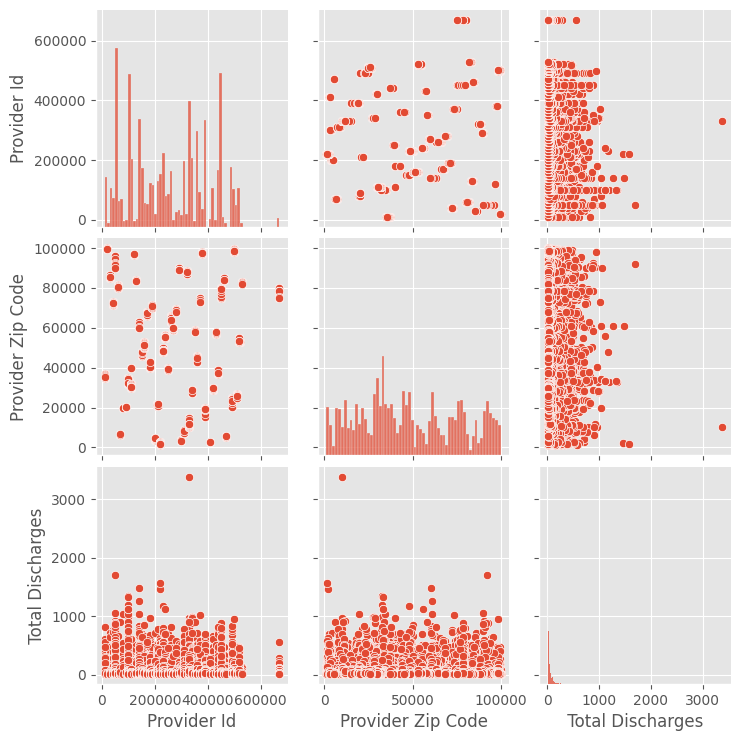

In [17]:
df = pd.read_csv(r"C:\\Users\\suchi\\Desktop\\hospital-charge-data\\Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_the_Top_100_Diagnosis-Related_Groups__DRG__-_FY2011.csv")
print(df)  #Visualising the dataset
import seaborn as sns
sns.pairplot(df)

In [18]:
np.where(pd.isnull(df))   #Finding blanks or NaNs in the dataset
np.where(df.applymap(lambda x: x == ''))

C:\Users\suchi\AppData\Local\Temp\ipykernel_18120\25596751.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  np.where(df.applymap(lambda x: x == ''))


(array([], dtype=int64), array([], dtype=int64))

In [19]:
list_of_column_positions=[2,4,5,8,9,10,11]
df=df.iloc[:,list_of_column_positions]
df = df.rename(columns={df.columns[0]: 'Provider_Name', df.columns[1]:'Provider_City', df.columns[2]:'Provider_State',
                        df.columns[3]:'Total_Discharges',
                        df.columns[4]: 'Average_Covered_Charges', 
                        df.columns[5]: 'Average_Total_Payments',
                        df.columns[6]:'Average_Medicare_Payments'})
df.to_csv('C:\\Users\\suchi\\Desktop\\hospital-charge-data\\data_out.csv')

df_AL = df[df['Provider_State'] == 'AL']
df_AK = df[df['Provider_State'] == 'AK']
df_AZ = df[df['Provider_State'] == 'AZ']
df_AR = df[df['Provider_State'] == 'AR']
df_CA = df[df['Provider_State'] == 'CA']
df_CO = df[df['Provider_State'] == 'CO']
df_CT = df[df['Provider_State'] == 'CT']
df_DE = df[df['Provider_State'] == 'DE']
df_DC = df[df['Provider_State'] == 'DC']
df_FL = df[df['Provider_State'] == 'FL']
df_GA = df[df['Provider_State'] == 'GA']
df_HI = df[df['Provider_State'] == 'HI']
df_ID = df[df['Provider_State'] == 'ID']
df_IL = df[df['Provider_State'] == 'IL']
df_IN = df[df['Provider_State'] == 'IN']
df_IA = df[df['Provider_State'] == 'IA']
df_KS = df[df['Provider_State'] == 'KS']
df_KY = df[df['Provider_State'] == 'KY']
df_LA = df[df['Provider_State'] == 'LA']
df_ME = df[df['Provider_State'] == 'ME']
df_MD = df[df['Provider_State'] == 'MD']
df_MA = df[df['Provider_State'] == 'MA']
df_MI = df[df['Provider_State'] == 'MI']
df_MN = df[df['Provider_State'] == 'MN']
df_MS = df[df['Provider_State'] == 'MS']
df_TX = df[df['Provider_State'] == 'TX']
df_MO = df[df['Provider_State'] == 'MO']
df_MT = df[df['Provider_State'] == 'MT']
df_NE = df[df['Provider_State'] == 'NE']
df_NV = df[df['Provider_State'] == 'NV']
df_NH = df[df['Provider_State'] == 'NH']
df_NJ = df[df['Provider_State'] == 'NJ']
df_NM = df[df['Provider_State'] == 'NM']
df_NY = df[df['Provider_State'] == 'NY']
df_NC = df[df['Provider_State'] == 'NC']
df_ND = df[df['Provider_State'] == 'ND']
df_OH = df[df['Provider_State'] == 'OH']
df_OK = df[df['Provider_State'] == 'OK']
df_OR = df[df['Provider_State'] == 'OR']
df_PA = df[df['Provider_State'] == 'PA']
df_RI = df[df['Provider_State'] == 'RI']
df_SC = df[df['Provider_State'] == 'SC']
df_SD = df[df['Provider_State'] == 'SD']
df_TN = df[df['Provider_State'] == 'TN']
df_UT = df[df['Provider_State'] == 'UT']
df_VT = df[df['Provider_State'] == 'VT']
df_VA = df[df['Provider_State'] == 'VA']
df_WA = df[df['Provider_State'] == 'WA']
df_WV = df[df['Provider_State'] == 'WV']
df_WI = df[df['Provider_State'] == 'WI']
df_WY = df[df['Provider_State'] == 'WY']


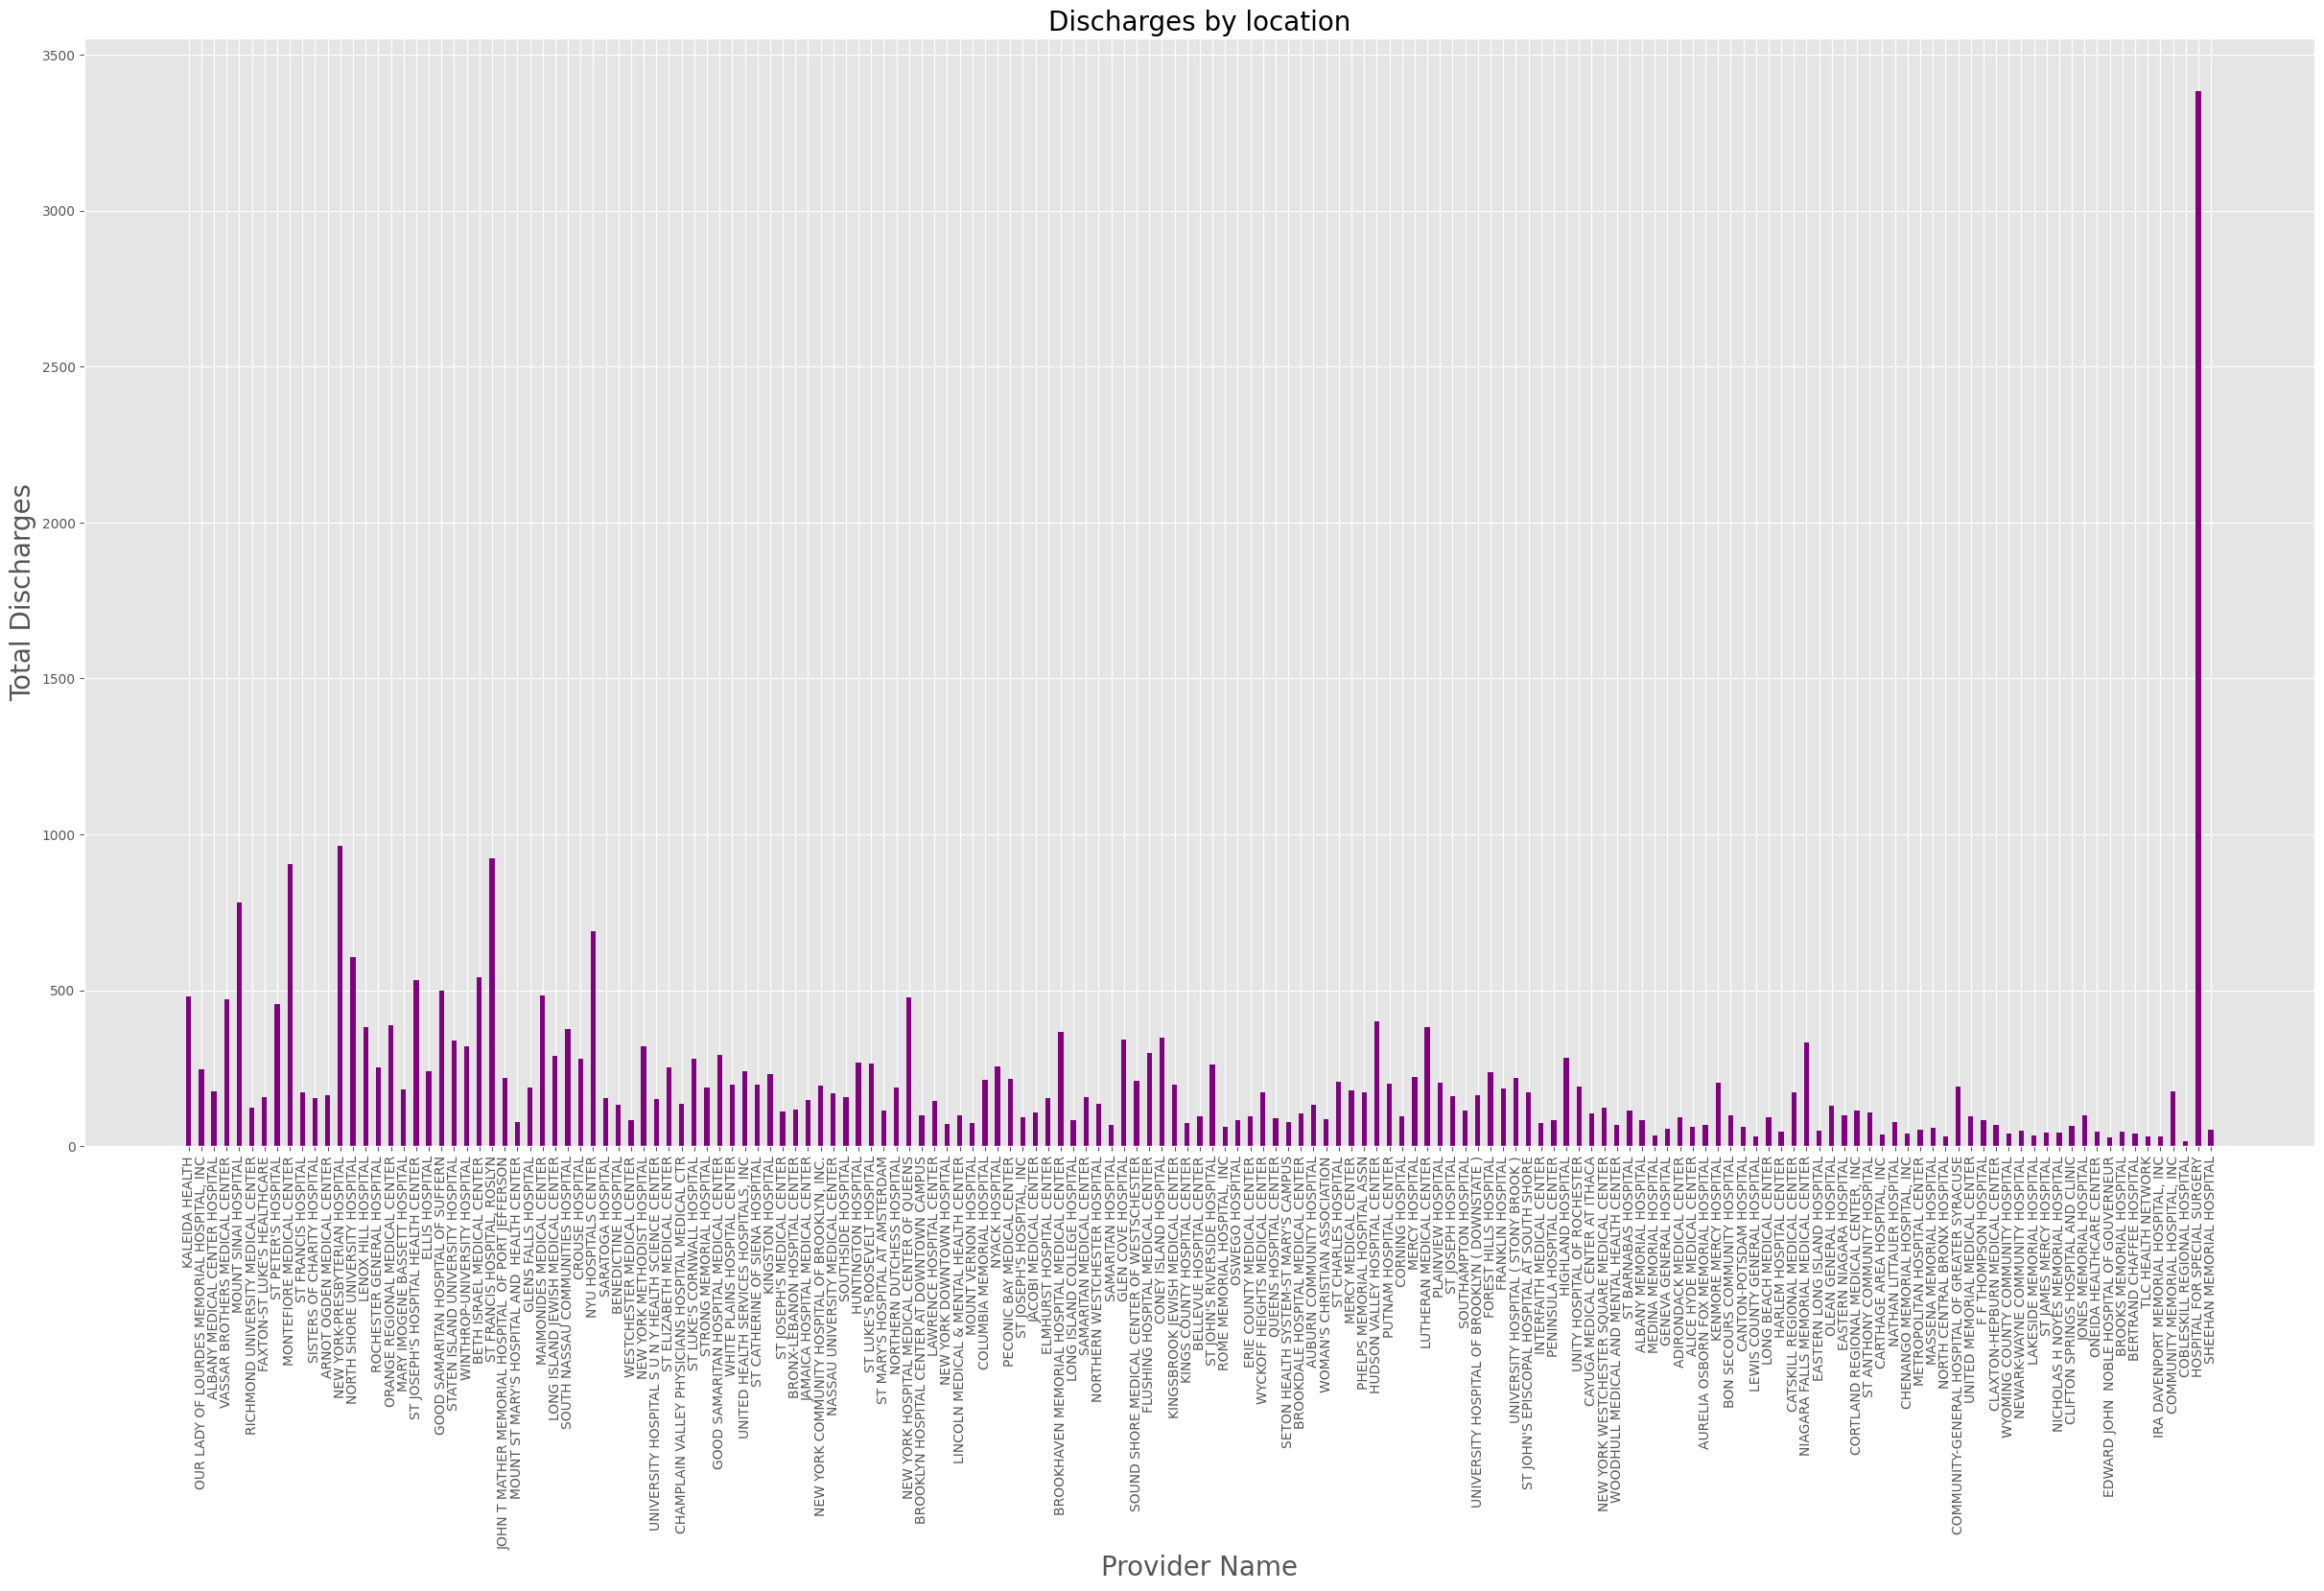

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt  
import matplotlib.ticker as ticker

import plotly.express as px

fig = plt.subplots(figsize=(30, 15))
plt.bar(x=df_NY['Provider_Name'], height=df_NY['Total_Discharges'],color ='purple', width=0.4)  # Randomly choosing New York dataset to visualise our data
plt.title('Discharges by location', fontsize=20)
plt.xlabel('Provider Name', fontsize=20)
plt.ylabel('Total Discharges', fontsize=20)

plt.xticks(rotation=90)

plt.show() 


C:\Users\suchi\AppData\Local\Temp\ipykernel_18120\2483626387.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NY['Average_Medicare_Payments']=df_NY['Average_Medicare_Payments'].str.replace('[$|,]', '', regex=True)
C:\Users\suchi\AppData\Local\Temp\ipykernel_18120\2483626387.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NY['Average_Total_Payments']=df_NY['Average_Total_Payments'].str.replace('[$|,]', '', regex=True)


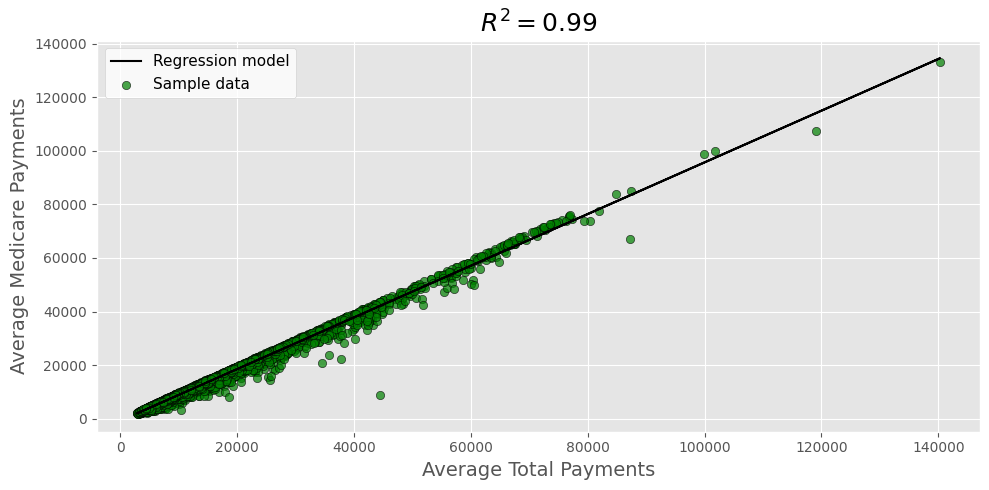

In [21]:
from sklearn.linear_model import LinearRegression   #Studying relationship between the average total payments and the average medicare payments made for the healthcare providers on the State of New York
from sklearn import linear_model   

df_NY['Average_Medicare_Payments']=df_NY['Average_Medicare_Payments'].str.replace('[$|,]', '', regex=True)
df_NY['Average_Total_Payments']=df_NY['Average_Total_Payments'].str.replace('[$|,]', '', regex=True)
df_NY = df_NY.astype({"Average_Medicare_Payments": float})
df_NY = df_NY.astype({"Average_Total_Payments": float})


X = df_NY['Average_Total_Payments'].values.reshape(-1,1)
y = df_NY['Average_Medicare_Payments'].values
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)
r2 = model.score(X, y)
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='green', alpha=0.7, label='Sample data')
ax.set_xlabel('Average Total Payments', fontsize=14)
ax.set_ylabel('Average Medicare Payments', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()